## Ejercicio Titanic mejorado en Arboles Aleatorios

In [1]:
%matplotlib inline
%pip install mlxtend
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Cargamos el dataset
df= pd.read_csv("./Data/train.csv")
# Descripción genereal del conjunto de datos
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# Cambiamos la variable categórica Sex por la variable numérica Sex_male (Donde male = 1, fremale = 0)
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,True


In [4]:
# Seleccionamos las características para el modelo
data = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp','Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,True,7.2500,22.0,3,1,0
1,False,71.2833,38.0,1,1,1
2,False,7.9250,26.0,3,0,1
3,False,53.1000,35.0,1,1,1
4,True,8.0500,35.0,3,0,0


In [5]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex_male  891 non-null    bool   
 1   Fare      891 non-null    float64
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3)
memory usage: 35.8 KB


In [6]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["Survived"],axis = 1)

# y es nuestra variable dependiente
y = data.Survived

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [7]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
BA_model = RandomForestClassifier(n_estimators = 19, 
                                  random_state = 2016,
                                  min_samples_leaf = 8,)

In [8]:
# Crear un imputador con estrategia de imputación 
imputer = SimpleImputer(strategy='mean')

In [9]:
# Aplicar la imputación a los datos de entrenamiento y prueba
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [10]:
BA_model.fit(X_train_imputed, y_train)

RandomForestClassifier(min_samples_leaf=8, n_estimators=19, random_state=2016)

In [11]:
# Accuracy promedio
BA_model.score(X_test_imputed, y_test)

0.8116591928251121

### Matriz de confusión

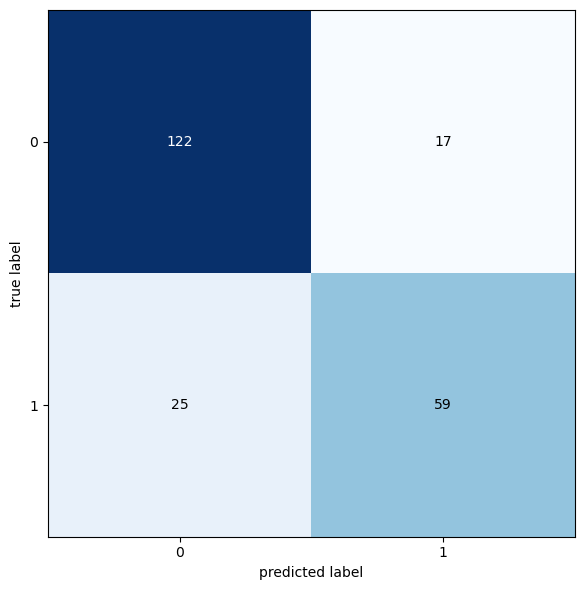

In [12]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test_imputed)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()